In [1]:
# This code generates Figure 8

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Feb  2 15:14:03 2020

@author: vicky
"""
# add this: `%matplotlib inline` in the console  for printing the plot


import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import math
from time import time as tm
import warnings

import numba
from numba import jit
#from google.colab import drive
#drive.mount('/content/drive')


In [2]:
from SpikingNetFunction import *
from RateNetFunctions import *
from DefaultParamsN5e3 import *

runsims=True

Time to generate connections: 0.75 sec.


In [3]:

# Perturbations to each population

Ne1=int(Ne/2)

sigma=Xe0/5

ue=sigma*np.random.randn(Ne)
ve=sigma*np.random.randn(Ne)
ui=sigma*np.zeros(Ni)
vi=sigma*np.zeros(Ni)

MMTrial=numtrials-10

# Whether the U and V stimuli are on/off
uon=np.zeros(numtrials)
von=np.zeros(numtrials)

# Matches
uon[:]=2*np.random.rand(numtrials)#np.random.randn(numtrials)
von[:]=uon[:]

# Mismatches
uon[MMTrial]=1
von[MMTrial]=0


# Input perturbations
Xe=Xe0+np.outer(ue,uon)+np.outer(ve,von)
Xi=Xi0+np.outer(ui,uon)+np.outer(vi,von)



In [4]:
fname1='./MatchMisMatchSpikeSim_dataDistTimeDep_N'+str(int(N/1000))+'e3.npy'

if runsims:
  # Run sim
  #Jei=Jei0.copy()
  #Jii=Jii0.copy()
  startsims = tm()
  with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    MeanIee,MeanIei,MeanIie,MeanIii,AlleRates,AlliRates,IeeRec,IeiRec,IexRec,VeRec,SeRec,SiRec=MultiTrialSpikingNet0(Jee,Jei0,Jie,Jii0,Xe,Xi,taum,EL,Vth,Vre,DeltaT,VT,Vlb,taue,taui,r0e,r0i,tauSTDP,etae,etai,eiPlast,iiPlast,trialrecord,numerecord,numirecord,Nt,dt,Nburn,maxns,dtRecord)
  simstime = tm()-startsims
  print('Time for simulations: %.2f sec'%(simstime))    
  print('Time per sec: %.2f sec'%(1000*(simstime)/(T*N)))
  ########################################################### save data ###########################################################   
  with open(fname1, 'wb') as f:
    np.save(f, MeanIee)
    np.save(f, MeanIei)
    np.save(f, MeanIie)
    np.save(f, MeanIii)
    np.save(f, Xe)
    np.save(f, Xi)
    np.save(f, AlleRates)
    np.save(f, AlliRates)
    np.save(f, VeRec)
    np.save(f, SeRec)
    np.save(f, SiRec)
    np.save(f, simstime)    

else:
  ########################################################### load data ########################################################### 
  with open(fname1, 'rb') as f:
    MeanIee = np.load(f)
    MeanIei = np.load(f)
    MeanIie = np.load(f)
    MeanIii = np.load(f)
    Xe = np.load(f)
    Xi = np.load(f)
    AlleRates = np.load(f)
    AlliRates = np.load(f)
    VeRec = np.load(f)
    SeRec = np.load(f)
    SiRec = np.load(f) 
    simstime = np.load(f)

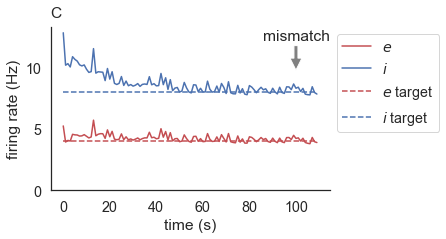

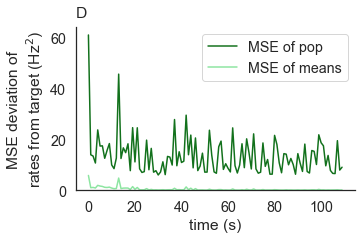

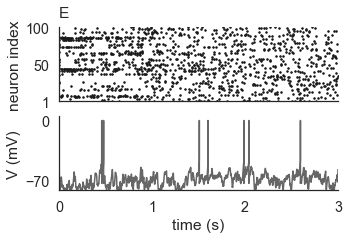

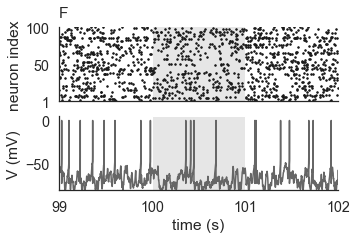

[]

In [5]:
# Make plots


import seaborn as sns
from matplotlib.patches import Rectangle

sns.set(context='notebook',style='white',font_scale=1.3)


# Rates averaged over each trial
reSpikeT=np.mean(AlleRates,axis=1)
riSpikeT=np.mean(AlliRates,axis=1)
rSpikeT=np.array([reSpikeT,riSpikeT])


AllRatesSpike=np.block([AlleRates,AlliRates])
r0Spike=np.block([r0e+np.zeros_like(AlleRates),r0i+np.zeros_like(AlliRates)])
MSEPopSpike=np.mean((AllRatesSpike-r0Spike)**2,axis=1)
MSEMeanSpike=(.8*(reSpikeT-r0e)**2+.2*(riSpikeT-r0i)**2)

MMcolor=[.9,.9,.9]

# Raster and V plot params
NePlot=100
msize=3
NumTrialsPlot=3

TrialsPlot1=range(0,3)
TrialsPlot2=range(29,32)
whichVneuron=1

Xwhichtrials=np.arange(96,103)


plt.figure(figsize=(5, 3))
plt.plot(np.arange(numtrials)*T/1000,1000*reSpikeT,color=sns.color_palette()[3], label=r'$e$')
plt.plot(np.arange(numtrials)*T/1000,1000*riSpikeT,color=sns.color_palette()[0], label=r'$i$')
plt.plot(np.arange(numtrials)*T/1000,1000*r0e+np.zeros(numtrials),'--',color=sns.color_palette()[3], label=r'$e$ target')
plt.plot(np.arange(numtrials)*T/1000,1000*r0i+np.zeros(numtrials),'--',color=sns.color_palette()[0], label=r'$i$ target')
plt.annotate('mismatch', xy=(MMTrial,9.75), xytext=(0, 30),textcoords='offset points',ha='center',
             arrowprops=dict(facecolor='gray', shrink=0.0))
sns.despine()
plt.xlabel('time (s)')
plt.ylabel('firing rate (Hz)')
plt.yticks([0,5,10])
plt.ylim(bottom=0)
plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.title('C',loc='left',pad=10)

plt.figure(figsize=(5, 3))
plt.plot(np.arange(numtrials)*T/1000,1e6*MSEPopSpike,color=sns.color_palette('dark')[2],label='MSE of pop')
plt.plot(np.arange(numtrials)*T/1000,1e6*MSEMeanSpike,color=sns.color_palette('pastel')[2],label='MSE of means')
sns.despine()
plt.xlabel('time (s)')
plt.ylabel('MSE deviation of\n'+r'rates from target (Hz$^2$)')
plt.ylim(bottom=-.1)
plt.legend()
plt.title('D',loc='left',pad=10)

plt.subplots(figsize=(5,3))
plt.subplot(2,1,1)
for j in TrialsPlot1:
    Inds=np.where(np.logical_and(SeRec[j,1,:]<NePlot , SeRec[j,0,:]>0))
    plt.plot((SeRec[j,0,Inds]+trialrecord[j]*T)/1000,SeRec[j,1,Inds]+1,'k.',markersize=msize)
#plt.xlabel('time (s)')
plt.ylabel('neuron index')    
plt.xlim([0,3])
plt.ylim([1,NePlot])
plt.xticks([])
plt.yticks([1, 50, 100])
plt.title('E',loc='left',pad=10)


whichVneuron=2
#plt.figure(figsize=(5,1.5))
plt.subplot(2,1,2)
for j in TrialsPlot1:
    Vplot=VeRec[j,whichVneuron,:]
    Vplot[Vplot>-40]=0
    plt.plot((np.arange(0,T,dt)+T*trialrecord[j])/1000,Vplot,color=[.4,.4,.4])
plt.xlabel('time (s)')
plt.ylabel('V (mV)')    
plt.xlim([0,3])
sns.despine()
plt.ylim([-81,5])
plt.xticks([0,1,2,3])
plt.yticks([-70,0])  


plt.subplots(figsize=(5,3))
plt.subplot(2,1,1)
for j in TrialsPlot2:
    Inds=np.where(np.logical_and(SeRec[j,1,:]<NePlot , SeRec[j,0,:]>0))
    plt.plot((SeRec[j,0,Inds]+trialrecord[j]*T)/1000,SeRec[j,1,Inds]+1,'k.',markersize=msize)
rect=plt.Rectangle((MMTrial,1),1,100,facecolor=MMcolor)
plt.gca().add_patch(rect)
#plt.xlabel('time (s)')
plt.ylabel('neuron index')    
plt.xlim([MMTrial-1,MMTrial+2])
plt.ylim([1,NePlot])
plt.xticks([])
plt.yticks([1, 50, 100])
plt.title('F',loc='left',pad=10)


plt.subplot(2,1,2)
for j in TrialsPlot2:
    Vplot=VeRec[j,whichVneuron,:]
    Vplot[Vplot>-40]=0
    plt.plot((np.arange(0,T,dt)+T*trialrecord[j])/1000,Vplot,color=[.4,.4,.4])
rect=plt.Rectangle((MMTrial,-81),1,86,facecolor=MMcolor)
plt.gca().add_patch(rect)
plt.xlabel('time (s)')
plt.ylabel('V (mV)')    
sns.despine()
plt.xlim([MMTrial-1,MMTrial+2])
plt.ylim([-81,5])
plt.xticks(range(MMTrial-1,MMTrial+3))


plt.show()




[]